In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = mnist.load_data() #descargar la base de datos MNIST

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
#datos de prueba y entrenamiento
(x_train, y_train), (x_test, y_test) = dataset 

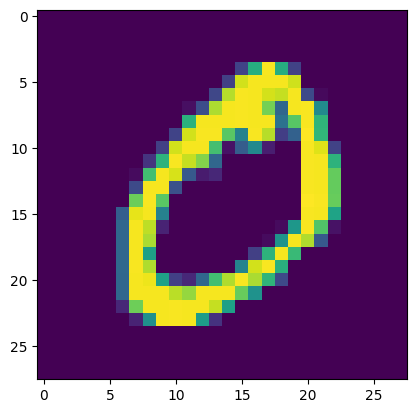

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1]) #dato aleatorio (2) de entrenamiento 

In [10]:
x_train.shape #dimensiones (datos, tamaño de la imágen)

(60000, 28, 28)

In [11]:
print (y_train[1]) #En efecto, es un cero

0


In [12]:
num_classes=10  #one hot encouding para y 
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

In [13]:
y_trainc[1] #asi se ve un '0' con one hot encouding

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
#normalizamos las imágenes a valores entre 0 y 1 
x_trainv = x_train.reshape(60000,784) 
x_testv = x_test.reshape(10000,784)
x_train = x_trainv.astype("float32") / 255.0
x_test = x_testv.astype("float32") / 255.0

In [27]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,))) #aplana las imágenes
model.add(Dense(num_classes, activation='softmax')) #aplicamos softmax en la capa de salida 

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile( optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
#Creamos nuestro modelo con el optimizador adam, categorical cross_entropy al igual que en la anterior tarea.

In [33]:
#Entrenamos nuestro modelo con 30 épocas
history= model.fit(x_trainv, y_trainc,
                   epochs=30,
                   batch_size=128,
                   verbose=1,
                   validation_data=(x_testv,y_testc)
                   )

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8839 - loss: 0.4314 - val_accuracy: 0.8916 - val_loss: 0.4030
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8871 - loss: 0.4095 - val_accuracy: 0.8933 - val_loss: 0.3911
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8902 - loss: 0.3936 - val_accuracy: 0.8943 - val_loss: 0.3756
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8925 - loss: 0.3808 - val_accuracy: 0.9001 - val_loss: 0.3576
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8953 - loss: 0.3700 - val_accuracy: 0.9004 - val_loss: 0.3491
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8979 - loss: 0.3607 - val_accuracy: 0.9045 - val_loss: 0.3416
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8993 - loss: 0.3520 - val_accuracy: 0.9052 - val_loss: 0.3323
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9010 - loss: 0.3451 - val_accu

In [35]:
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=1)
print(f"Exactitud en el conjunto de prueba: {test_acc:.4f}")
print(f"Valor de la función de pérdida: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9178 - loss: 0.2907
Exactitud en el conjunto de prueba: 0.9178
Valor de la función de pérdida: 0.2907
